<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/machine_learning/blob/main/7_XGBoost/xgboost.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

# XGBoost

In [1]:
!pip3 install -U scikit-learn --upgrade # necesitamos sklearn >= 0.24

In [2]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [4]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 46.5 MB/s eta 0:00:00


In [5]:
!pip install ipywidgets # puede ser necesario si lo corren local

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [6]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


## Introducción

Vamos a trabajar con un dataset famoso llamado **adult** tomado de UCI: https://archive.ics.uci.edu/ml/datasets/Adult . Son datos obtenidos del censo de Estados Unidos de 1994 y la tarea consiste en predecir si una persona gana más de 50.000 dólares al año o no. Por lo tanto, cada fila es una persona y las columnas son las características de la misma.

In [7]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("https://storage.googleapis.com/humai-datasets/aws_s3/ml_avanzado/2_Boosting_de_arboles/adult_train.csv")

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [9]:
df.shape

(32561, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Las variables categóricas son: **workclass**, **education**, **marital-status**, **occupation**, **relationship**, **race**, **sex**, **native-country**.

- Las variables numéricas son: **age**, **fnlwgt**, **education-num**, **capital-gain**, **capital-loss**, **hours-per-week**

## Análisis exploratorio

Para este EDA vamos a usar un paquete que nos genera numerosos gráficos automáticamente y, por lo tanto, nos permite una aproximación rápida a los datos con los que vamos a trabajar.

In [11]:
# sweetviz es un paquete de análisis exploratorio automático, una alternativa también es pandas-profiling
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

El siguiente comando escribe un *html* con una serie de gráficos. Además, intenta abrir una pestaña nueva. Si ésto no sucede entonces deberán ejecutar manualmente el archivo. Para eso, si están en Google Colab deberán descargar el archivo y luego darle doble clic al archivo en su computadora.

In [12]:
advert_report.show_html('df.html')

Report df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Observaciones

Del reporte de *sweetviz* interesan destacar las siguientes cuestiones:


1- En **workclass** los nulos se identifican con **?**.

2- **target** está parejamente distribuido, con 76% para la categoría **<=50K** y 24% para **>50K**.

3- **capital-gain** y **capital-loss** son variables continuas pero mayoritariamente son 0 (91.7% y 95.3% respectivamente).

Cliqueando en ASSOCIATIONS (arriba al medio) podemos ver métricas de correlación entre variables, allí se observa que:

4- **education-num**, **capital-gain**, **hours-per-week**, **age**, **relationship** y en menor medida **marital-status** son las variables más correlacionadas con **target**.

## Preparamos train y test

## trabajamos con ordinal encoder y label encoder

In [22]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [23]:
X_train = df.drop("target",axis=1)
y_train = df["target"]

In [24]:
# LabelEncoder se usa para codificar las labels como números
l_encoder = LabelEncoder()

In [25]:
# Al hacer fit el objeto aprende un mapeo de cada label a un número que luego usaremos en test.
# Al hacer transform ejecuta el mapeo. fit_transform primero ejecuta fit y luego transform sobre test
y_train = l_encoder.fit_transform(y_train)

In [26]:
test = pd.read_csv("https://storage.googleapis.com/humai-datasets/aws_s3/ml_avanzado/2_Boosting_de_arboles/adult_test.csv")

In [27]:
X_test = test.drop("target",axis=1)
y_test = test["target"]

In [28]:
l_encoder.transform(test["target"])

array([0, 0, 1, ..., 0, 0, 1])

In [29]:
# acá estamos traduciendo las etiquetas de las labels a números, con el mismo mapeo de antes (!!!!)
y_test = l_encoder.transform(y_test)

In [30]:
# inverse_transform nos permite hacer el mapeo en el sentido opuesto, de número a label
l_encoder.inverse_transform(y_test)

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [32]:
# Para chequear que el mapeo se hace correctamente podemos hacer lo siguiente:

In [31]:
np.array_equal(test["target"].values, l_encoder.inverse_transform(y_test))  ## controlde la tranbsformacion

True

## Entreno modelos

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

In [35]:
import scipy.stats as st

In [36]:
from xgboost.sklearn import XGBClassifier

In [37]:
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [38]:
from catboost import CatBoostClassifier

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

num_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [42]:
# vamos a usar polynomial features sobre las variables numéricas
poly = PolynomialFeatures()

In [43]:
# Las categorías "nuevas" que aparezcan se imputan con el valor de unknown_value
o_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99999999)

Los modelos que vamos a probar son XGBoost, LightGBM, CatBoost y Regresión logística.

Armamos un pipeline en donde:

1- Usamos `ColumnTransformer` para seleccionar las columnas numéricas y aplicar `PolynomialFeatures`. `remainder="passthrough"` hace que el resto de las columnas pasen sin cambios. De este paso vamos a optimizar el hiperparámetro que indica el grado del polinomio: `selector_num__poly__degree`.

2- Luego aplicamos una transformación sobre las variables categóricas. Para los modelos basados en árboles usamos `OrdinalEncoder` que codifica las categorías como números. De este paso vamos a optimizar el hiperparámetro que indica cómo se representan las categorías nuevas, no vistas en train, con `ord_encoder__unknown_value`. Por último, para la regresión logística aplicamos one hot encoding.

3- Finalmente aplicamos un clasificador.

Nota: los nombres de los hiperparámetros que vamos a optimizar se llaman como `nombre del step + __ + nombre del hiperparámetro`

In [47]:
pipeline = Pipeline([
    ("selector_num", ColumnTransformer(  ## seleccionar las columnas numericas
        [
            ("poly", poly, num_columns)  ## columnas numericas con poly
        ], remainder="passthrough")
    ),
    ("cat_encoder", o_encoder), ## se puede aplicar sobre las variables categoricas one_hot_encoding pueden usar otro  pipeline con categoricas
    ("classifier", CatBoostClassifier())  ## se usa un clasificador
    ]
)

###Cuando trabajamos con pipeline conjunto de pasos, nombres prefijo de hiperparametros, ,nombre de paso e hiperperamtro

In [48]:
pipeline.get_params()

{'memory': None,
 'steps': [('selector_num',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('poly', PolynomialFeatures(),
                                    ['age', 'fnlwgt', 'education-num',
                                     'capital-gain', 'capital-loss',
                                     'hours-per-week'])])),
  ('cat_encoder',
   OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999)),
  ('classifier', <catboost.core.CatBoostClassifier at 0x7bafef06dba0>)],
 'transform_input': None,
 'verbose': False,
 'selector_num': ColumnTransformer(remainder='passthrough',
                   transformers=[('poly', PolynomialFeatures(),
                                  ['age', 'fnlwgt', 'education-num',
                                   'capital-gain', 'capital-loss',
                                   'hours-per-week'])]),
 'cat_encoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999999),
 'classifier': <ca

In [49]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [51]:
# este diccionario de parámetros lo vamos a usar tanto para XGBoost como para
# LightGBM grilla de hiperparametros
params = {
    "classifier__n_estimators": st.randint(20,150), # n. de árboles.
    "classifier__max_depth": st.randint(3, 12),     # máxima profundiad del árbol
    "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
    "classifier__colsample_bytree": one_to_left, # ratio de la muestra de las columnas a la hora de construir el árbol
    "classifier__subsample": one_to_left,     # ratio de la muestra de las observaciones
    'classifier__reg_alpha': st.uniform(0.05,10),   # término de regularización L1
    "classifier__min_child_weight": st.uniform(1,20), # Suma mínima del peso de la instancia (hessiano) requerida en los hijos
}

##en catboost los hiperparametros son distintos

In [53]:
other_params = {"selector_num__poly__degree": [1, 2, 3], ## ordinal encoder tiene 2 parametros
                "cat_encoder__unknown_value": [np.nan, 99999999]}

Para optimizar modelos con distintos hiperparámetros se puede usar una lista de diccionarios, en donde cada diccionario es un hiperparámetro distinto.

En primer lugar, classifier "pisa" el clasificador del pipeline original, en este caso `CatBoostClassifier`.

En segundo lugar, pasamos los parámetros que definimos en `params` (usados en XGBoost y LightGBM) y `other_params` (que son los hiperparámetro que no corresponden al clasificador).

En tercer lugar, también incluímos otros hiperparámetros de los clasificadores.

In [60]:
search_space = [{"classifier": [XGBClassifier(n_jobs=3, eval_metric="logloss", use_label_encoder=False)],
                 **params,  ## cada diccionario es un modelo distinto, classifier lista ,
                 **other_params, ##
                "classifier__gamma": st.uniform(0, 10), # reducción mínima de la pérdida requerida para hacer un split, classifier
                }, ## cada diccionario es un modelo distinto, classifier lista ,
                {"classifier": [LGBMClassifier(n_jobs=3, verbose=-1)],
                 **params,
                **other_params},
                {"classifier": [CatBoostClassifier(thread_count=3, verbose=False)],
                 **other_params,
                 "classifier__n_estimators": st.randint(20,150), # n. de árboles.
                "classifier__max_depth": st.randint(3, 12),     # máxima profundiad del árbol
                "classifier__learning_rate": st.uniform(0.05, 0.4), # learning rate (xgb’s “eta”)
                "classifier__subsample": one_to_left,     # ratio de la muestra de las observaciones
                },
               {
                   "classifier": [LogisticRegression(max_iter=1000)],
                   "classifier__C": [10**x for x in range(-5, 3)], ## regulariza en la regresion logistica
                   "cat_encoder": [OneHotEncoder(handle_unknown="ignore")],  ## ordinal encoder
               }]

## va a pisar classifier catboost

In [57]:
model = RandomizedSearchCV(pipeline, search_space, n_iter=10, verbose=1, cv=3)

Comenzamos el entrenamiento

In [61]:
model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The L

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('selector_num',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('poly',
                                                                               PolynomialFeatures(),
                                                                               ['age',
                                                                                'fnlwgt',
                                                                                'education-num',
                                                                                'capital-gain',
                                                                                'capital-loss',
                                                                                'hours-per-week'])])),
                                             ('cat_encoder',
                                              OrdinalEncoder(handle_unknown='use_encoded_value',
                                                             unknown_value=99999999)),
                                             ('classifier',
                                              <catboost.c...
                                         'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bafdf192050>,
                                         'classifier__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bafedf777f0>,
                                         'selector_num__poly__degree': [1, 2,
                                                                        3]},
                                        {'cat_encoder': [OneHotEncoder(handle_unknown='ignore')],
                                         'classifier': [LogisticRegression(max_iter=1000)],
                                         'classifier__C': [1e-05, 0.0001, 0.001,
                                                           0.01, 0.1, 1, 10,
                                                           100]}],
                   verbose=1)

Guardamos los resultados

In [62]:
results = pd.DataFrame(model.cv_results_)

In [63]:
model.cv_results_

{'mean_fit_time': array([1.90229154, 5.59116228, 0.72496072, 1.65764769, 0.38033581,
        5.98883065, 2.18259788, 5.53628302, 5.47160689, 9.40952651]),
 'std_fit_time': array([0.48443289, 0.49844489, 0.15662231, 0.04442351, 0.00451507,
        0.59905636, 0.48453525, 0.42357184, 0.54048848, 0.52358936]),
 'mean_score_time': array([1.0228231 , 2.69708403, 0.20846756, 0.79446777, 0.16112876,
        2.74524546, 0.88130053, 2.8819929 , 2.99051539, 3.02857645]),
 'std_score_time': array([0.26093545, 0.25130379, 0.05911866, 0.00307446, 0.00547709,
        0.26071768, 0.10459527, 0.38477934, 0.54433167, 0.31402887]),
 'param_cat_encoder': masked_array(data=[OneHotEncoder(handle_unknown='ignore'), --, --, --, --,
                    --, --, --, --, --],
              mask=[False,  True,  True,  True,  True,  True,  True,  True,
                     True,  True],
        fill_value='?',
             dtype=object),
 'param_classifier': masked_array(data=[LogisticRegression(max_iter=1000),
  

In [64]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_cat_encoder', 'param_classifier', 'param_classifier__C',
       'param_cat_encoder__unknown_value',
       'param_classifier__colsample_bytree', 'param_classifier__learning_rate',
       'param_classifier__max_depth', 'param_classifier__min_child_weight',
       'param_classifier__n_estimators', 'param_classifier__reg_alpha',
       'param_classifier__subsample', 'param_selector_num__poly__degree',
       'param_classifier__gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [65]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cat_encoder,param_classifier,param_classifier__C,param_cat_encoder__unknown_value,param_classifier__colsample_bytree,param_classifier__learning_rate,...,param_classifier__subsample,param_selector_num__poly__degree,param_classifier__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.902292,0.484433,1.022823,0.260935,OneHotEncoder(handle_unknown='ignore'),LogisticRegression(max_iter=1000),0.00001,NaN,NaN,NaN,...,NaN,NaN,NaN,{'cat_encoder': OneHotEncoder(handle_unknown='...,0.759167,0.759167,0.759237,0.759190,0.000033,6
1,5.591162,0.498445,2.697084,0.251304,NaN,"LGBMClassifier(n_jobs=3, verbose=-1)",NaN,NaN,0.952199,0.323700,...,0.915328,3.0,NaN,"{'cat_encoder__unknown_value': nan, 'classifie...",0.858854,0.857103,0.863724,0.859894,0.002801,4
2,0.724961,0.156622,0.208468,0.059119,NaN,"LGBMClassifier(n_jobs=3, verbose=-1)",NaN,NaN,0.942109,0.251939,...,0.984185,1.0,NaN,"{'cat_encoder__unknown_value': nan, 'classifie...",0.865027,0.867514,0.870451,0.867664,0.002217,1
3,1.657648,0.044424,0.794468,0.003074,NaN,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,0.973146,0.167403,...,0.930343,2.0,7.126192,"{'cat_encoder__unknown_value': nan, 'classifie...",NaN,NaN,NaN,NaN,NaN,7
4,0.380336,0.004515,0.161129,0.005477,NaN,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,0.993642,0.232073,...,0.928626,1.0,8.795106,"{'cat_encoder__unknown_value': nan, 'classifie...",NaN,NaN,NaN,NaN,NaN,7
5,5.988831,0.599056,2.745245,0.260718,NaN,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,0.972176,0.253129,...,0.852470,3.0,4.812292,"{'cat_encoder__unknown_value': nan, 'classifie...",NaN,NaN,NaN,NaN,NaN,7
6,2.182598,0.484535,0.881301,0.104595,NaN,"LGBMClassifier(n_jobs=3, verbose=-1)",NaN,NaN,0.840086,0.372374,...,0.986303,2.0,NaN,"{'cat_encoder__unknown_value': nan, 'classifie...",0.862171,0.866040,0.869345,0.865852,0.002932,2
7,5.536283,0.423572,2.881993,0.384779,NaN,"LGBMClassifier(n_jobs=3, verbose=-1)",NaN,99999999.0,0.900645,0.280510,...,0.916024,3.0,NaN,"{'cat_encoder__unknown_value': 99999999, 'clas...",0.860420,0.864198,0.869068,0.864562,0.003540,3
8,5.471607,0.540488,2.990515,0.544332,NaN,"XGBClassifier(base_score=None, booster=None, c...",NaN,99999999.0,0.942440,0.097549,...,0.870933,3.0,9.601363,"{'cat_encoder__unknown_value': 99999999, 'clas...",NaN,NaN,NaN,NaN,NaN,7
9,9.409527,0.523589,3.028576,0.314029,NaN,<catboost.core.CatBoostClassifier object at 0x...,NaN,99999999.0,NaN,0.143124,...,0.916598,3.0,NaN,"{'cat_encoder__unknown_value': 99999999, 'clas...",0.852957,0.854800,0.862895,0.856884,0.004316,5


El mejor modelo es...

In [66]:
model.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('selector_num',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly',
                                                  PolynomialFeatures(degree=1),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('cat_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.9421093083065721,
                                learning_rate=0.25193893597300276, max_depth=5,
                                min_child_weight=1.9682461115970775,
                                n_estimators=56, n_jobs=3,
                                reg_alpha=0.8739696136406672,
                                subsample=0.9841846690219344, verbose=-1))])

Para a dibujar la curva ROC, para eso primero usamos `predict_proba` y luego importamos `plot_roc` de `scikitplot`.

In [67]:
y_predicted = model.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [68]:
!pip install scikit-plot

In [69]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [70]:
!pip install --upgrade scikit-learn  # Update scikit-learn
# Restart the kernel after installation



In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d # Import interp1d instead of interp


In [72]:
def plot_roc(y_true, y_probas, title='ROC Curves', plot_micro=True, plot_macro=True, classes_to_plot=None, ax=None,
             figsize=None, cmap='nipy_spectral', title_fontsize="large", text_fontsize="medium"):
    """Generates the ROC curves from labels and predicted scores/probabilities
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.
        y_probas (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.
        title (string, optional): Title of the generated plot. Defaults to
            "ROC Curves".
        plot_micro (boolean, optional): Plot the micro average ROC curve.
            Defaults to ``True``.
        plot_macro (boolean, optional): Plot the macro average ROC curve.
            Defaults to ``True``.
        classes_to_plot (list-like, optional): Classes for which the ROC
            curve should be plotted. If specified, only curves for these
            classes will be plotted. Defaults to ``None``, which plots curves
            for all classes.
        ax (:class:`matplotlib.axes.Axes`, optional): The axes upon which to
            plot the curve. If None, the plot is drawn on a new set of axes.
        figsize (2-tuple, optional): Tuple denoting figure size of the plot
            e.g. (6, 6). Defaults to ``None``.
        cmap (string or :class:`matplotlib.colors.Colormap` instance, optional):
            Colormap used for plotting the projection. View Matplotlib colormaps
            for available options.
            https://matplotlib.org/users/colormaps.html
            Defaults to "nipy_spectral".
        title_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer values. Defaults to
            "large".
        text_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer values. Defaults to
            "medium".
    Returns:
        ax (:class:`matplotlib.axes.Axes`): The axes on which the plot was
            drawn.
    Example:
        >>> import scikitplot as skplt
        >>> nb = GaussianNB()
        >>> nb = nb.fit(X_train, y_train)
        >>> y_probas = nb.predict_proba(X_test)
        >>> skplt.metrics.plot_roc(y_test, y_probas)
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe967d64490>
        >>> plt.show()
    .. image:: _static/examples/plot_roc.png
       :align: center
       :alt: ROC Curves
    """
    y_true = np.array(y_true)
    y_probas = np.array(y_probas)



In [77]:
plot_roc(y_test, y_predicted)

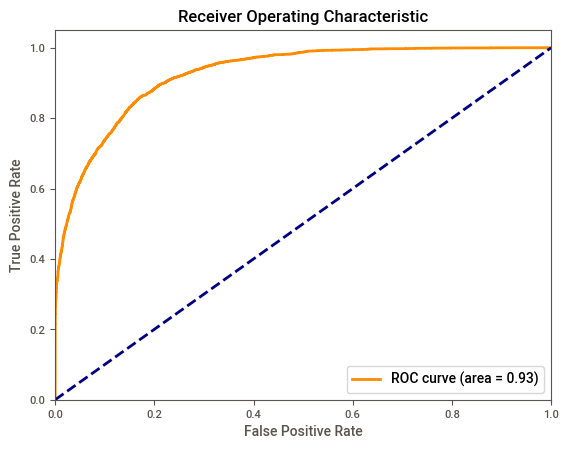

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_predicted are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:, 1])  # Use probabilities for the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using matplotlib.pyplot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
roc_auc_score(y_test, y_predicted[:,1])

0.9253752691321967

## Uso CatBoost con categorical features

In [80]:
categorical_features_indices = np.where(X_train.dtypes == object)[0]  ## indices de las columnas categoricas

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [82]:
model = CatBoostClassifier(  ## instanciamos catboost classifier
    random_seed=42,
    logging_level='Silent'## no imprimir cada paso
)

In [83]:
from catboost import Pool, metrics, cv

cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(X_train, y_train, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

## se usa metrica de classificacion con la metrica logloss

In [86]:
# obtengo la mejor epoch
cv_data["test-Logloss-mean"].argmin()

996

In [ ]:
# vamos a reentrenar con 811 steps

In [88]:
model = CatBoostClassifier(
    iterations=993,
    random_seed=42,
    logging_level='Silent',
    cat_features=categorical_features_indices
)

In [89]:
model.fit(X_train, y_train)

In [90]:
predictions_probs = model.predict_proba(X_test)

In [91]:
plot_roc(y_test, predictions_probs)

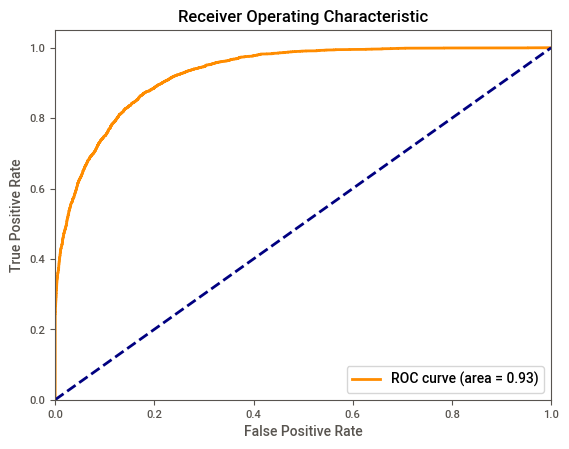

In [93]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_probs[:, 1])  # Use probabilities for the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve using matplotlib.pyplot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [94]:
roc_auc_score(y_test, predictions_probs[:,1])

0.9285332506987454